In order to successfully complete this assignment you must follow all instructions in this notebook and upload your files with your answers on or before **11:59pm on Friday March 29th**.

In [2]:
import matplotlib.pyplot as plt
from numpy import *

# Homework 5: 2D Wave Equation on CUDA

In this homework we will modify a 2D Wave Equation to run using CUDA.

### Goals for this assignment:

By the end of this assignment, you should be able to:

* Write code to run part of a C/C++ program in CUDA
* Optomize the CUDA code to run faster
* Conduct a timing study of your code

<img src="https://colbrydi.github.io/images/wave2d.gif" width=30% alt="animated gif">


----

# 1. Benchmark 2D wave equation

&#9989; <font color=red>**DO THIS:**</font> Download the code provided in the class repository in the folder called ```HW5_CUDA```.  Compile and run the code on the ```dev-intel14-k20``` and the ```dev-intel16-k80``` nodes. Generate a figure to compare how the serial code runs on both machines.


**Optional Bonus:** improve the speed of the serial code and report what you did to get improvements in performance. Include graphs that measure performance.

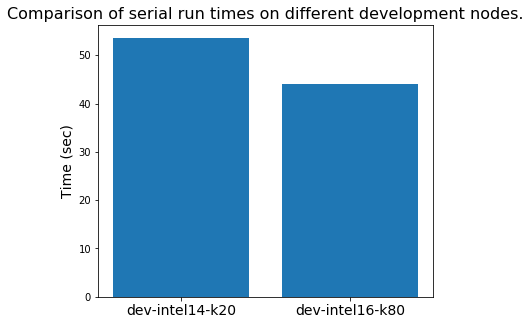

In [3]:
pos = [0,1]
labels = ['dev-intel14-k20', 'dev-intel16-k80']
values = [
    (53.751+53.919+53.094)/3,
    (43.887+44.284+43.717)/3
]
plt.figure(figsize=(6,5))
plt.bar(pos, values)
plt.xticks(pos, labels, fontsize=14);
plt.title("Comparison of serial run times on different development nodes.", fontsize=16)
plt.ylabel("Time (sec)", fontsize=14);

----
# 2. Measuring Speedup


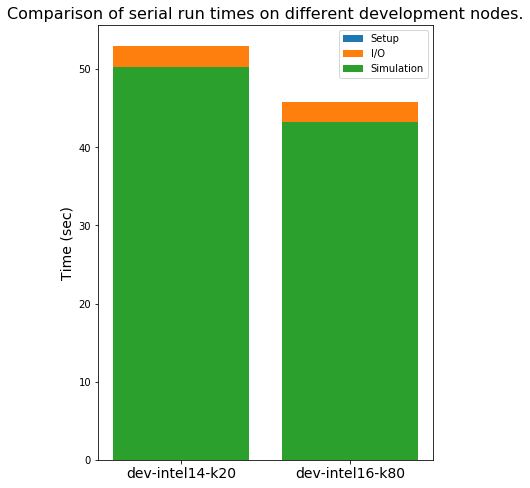

In [4]:
pos = [0,1]
labels = ['dev-intel14-k20', 'dev-intel16-k80']
plt.figure(figsize=(6,8))
plt.bar(pos, [0.012018+2.694386+50.305550, .009013+2.543116+43.274353], label="Setup")
plt.bar(pos, [2.694386+50.305550, 2.543116+43.274353], label="I/O")
plt.bar(pos, [50.305550, 43.274353], label="Simulation")
plt.xticks(pos, labels, fontsize=14);
plt.title("Comparison of serial run times on different development nodes.", fontsize=16)
plt.ylabel("Time (sec)", fontsize=14);
plt.legend()

Setup time is minimal on both development nodes, and I/O time is almost the same. There is a significant decrease in simulation time. 


# 3. Cudafy the code

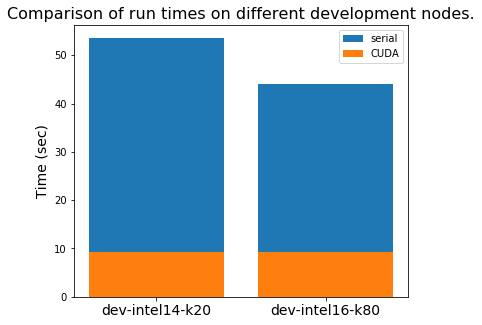

In [6]:
pos = [0,1]
labels = ['dev-intel14-k20', 'dev-intel16-k80']
values = [
    (53.751+53.919+53.094)/3,
    (43.887+44.284+43.717)/3,]
values2=[(9.191+9.264+9.200)/3,
    (9.322+9.366+9.230)/3
]
plt.figure(figsize=(6,5))
plt.bar(pos, values, label="serial")
plt.bar(pos, values2, label="CUDA")
plt.xticks(pos, labels, fontsize=14);
plt.title("Comparison of run times on different development nodes.", fontsize=16)
plt.ylabel("Time (sec)", fontsize=14);
plt.legend();

# 3. Homework Report

The goal of this project was to simulate the propagation of a wave originating from the center of a square box, and parallize it using CUDA. In serial, the simulation took ~53.5 and ~44 seconds, depending on the node, while when graphic card parallization was builit in it went down to just over 9 seconds. This is likely independent of node because the job is too small.

It was run on the HPCC, and is not difficult to run. Though you have to load quite a few modules before you compile and run. Specifically, the following are what I loaded.

module load GCC/7.3.0-2.30

module load libpng

module load CUDA

module load FFmpeg

When those are loaded, just "make" in the directory. You can also do "make video" or "make gif" to better visualize your results. Timing results are built into the serial code, and the bash time command was used to get the CUDA results. 

Using 2 dimensional blocks and tiling could potentially speed up this code a lot more, and would be very useful if one wanted to run larger sizes or more complex propagations. However, for our situation, it is unnecessary to implement that kind of work, as it would take a lot of effort and have little payoff.

# 4. Optional Bonus
There is a bug in how the 2D wave function is estimated. Review the following paper to see if you can improve the output:

http://hplgit.github.io/num-methods-for-PDEs/doc/pub/wave/pdf/wave-4print.pdf


In your report, explain exactly how you fixed the bug and include an updated video file.  

# 5. Compiler Optimized

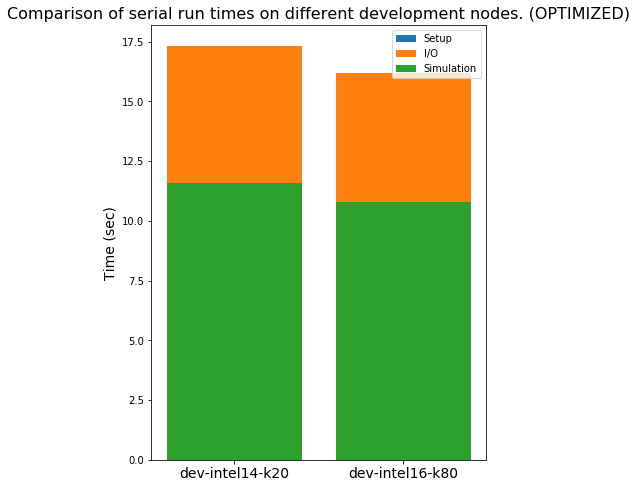

In [12]:
pos = [0,1]
labels = ['dev-intel14-k20', 'dev-intel16-k80']
plt.figure(figsize=(6,8))
plt.bar(pos, [0.009785+5.732525+11.586574, .009022+5.387639+10.779468], label="Setup")
plt.bar(pos, [5.732525+11.586574, 5.387639+10.779468], label="I/O")
plt.bar(pos, [11.586574, 10.779468], label="Simulation")
plt.xticks(pos, labels, fontsize=14);
plt.title("Comparison of serial run times on different development nodes. (OPTIMIZED)", fontsize=16)
plt.ylabel("Time (sec)", fontsize=14);
plt.legend()

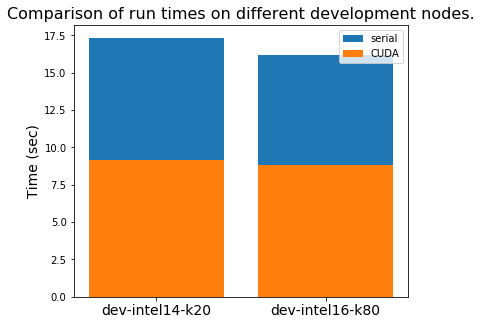

In [10]:
pos = [0,1]
labels = ['dev-intel14-k20', 'dev-intel16-k80']
values = [
    17.329559,
    16.177429]
values2=[9.166,
8.844    
]
plt.figure(figsize=(6,5))
plt.bar(pos, values, label="serial")
plt.bar(pos, values2, label="CUDA")
plt.xticks(pos, labels, fontsize=14);
plt.title("Comparison of run times on different development nodes. (OPTIMIZED)", fontsize=16)
plt.ylabel("Time (sec)", fontsize=14);
plt.legend();

----

### Turning in your homework

Now, you need to submit this assignment by uploading your files to the course Desire2Learn web page. Make sure you include your report and source code so the instructor can reproduce your results. 

&#169; Copyright 2019,  Michigan State University Board of Trustees